# Исследование объявлений о продаже квартир

**Описание проекта**

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 


**Описание данных**
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — общая площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

**План работы**


1. Изучение исходного файла.
2. Предобработка данных:
    - обработка пропусков и попытка объяснения их возникновения
    - обработка типов данных, где это возможно
    - обработка текстовых столбцов на уникальные значения
    - обработка редких значений и выбросов
3. Добавление дополнительных столбцов, необходимых для дальнейшего анализа.
4. Исследовательский анализ данных:
    - Изучение параметров объектов на основе гистограмм
    - Изучение быстроты продажи квартир
    - Изучение влияния некоторых отдельных факторов на общую стоимость жилья, а также на цену $1 м^2$.
5. Формирование выводов.

### Откройте файл с данными и изучите общую информацию. 

Импортируем файл с исходными данными в переменную `data`. Разделителем в csv-файле выступает `\t`.

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    # здесь была ссылка на файл на сервере Яндекса

Посмотрим на первые 5 строчек исходного датасета.

In [2]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Узнаем размер исходного датасета:

In [3]:
data.shape

(23699, 22)

Всего в исходной таблице 23699 строк и 22 столбца. <br/>
Вызовем метод `info()`, чтобы узнать основную информацию о таблице.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Как можно заметить, в таблице встречаются столбцы с пропусками. <br/> <br/>
Построим общую гистограмму для всех числовых столбцов таблицы.

In [5]:
import matplotlib.pyplot as plt

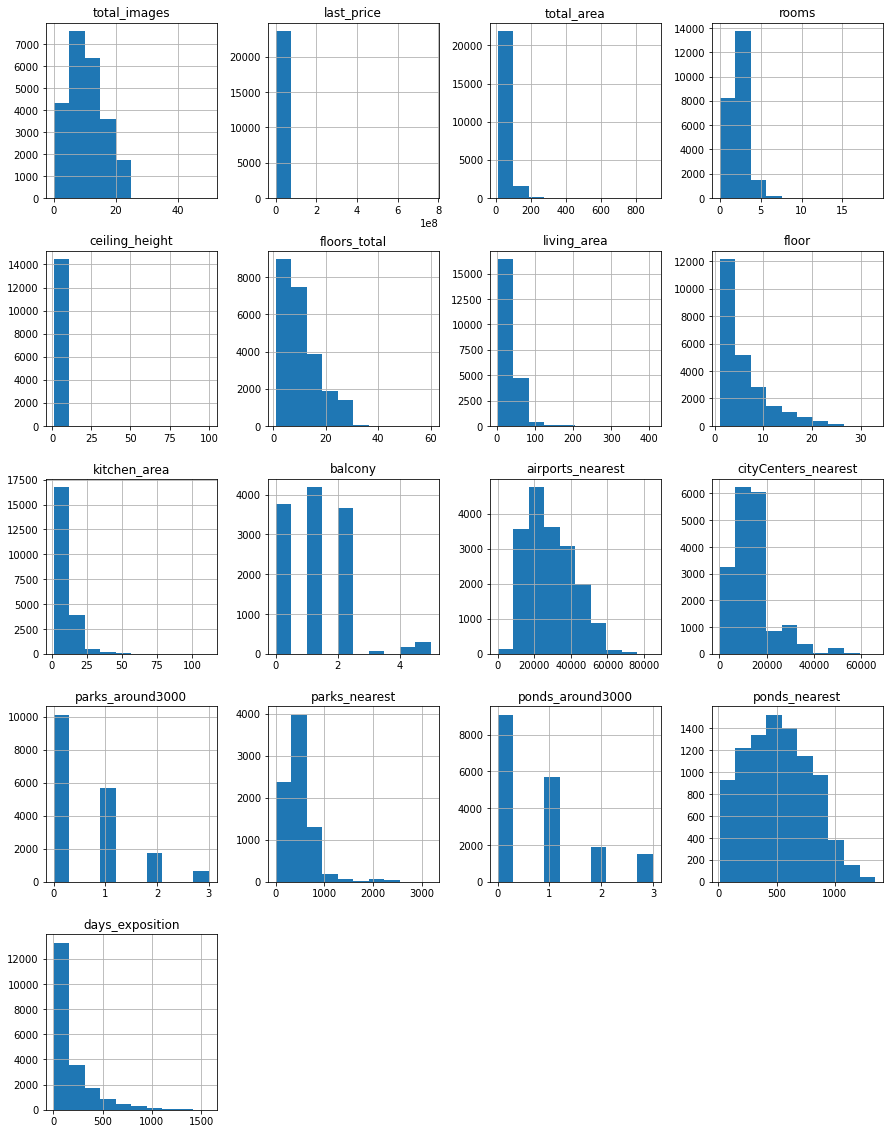

In [6]:
data.hist(figsize=(15, 20))
plt.show()

**Вывод**:<br/>
    Мы импортили исходную таблицу и получили общее первичное представление об исходных данных. В следующем разделе мы перейдем к предобработке данных. 

### Предобработка данных

#### Обработка пропусков

Выведем количество пропущенных значений для каждого столбца таблицы `data`. 

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Наибольшее количество пропусков наблюдается в следующих столбцах:
* `is_apartment`
* `balcony`
* `parks_nearest`
* `ponds_nearest` 

В остальных столбцах число пропусков меньше 6 тысяч. Обработаем в первую очередь эти столбцы.

Касательно пропусков столбцах `balcony` и `is_apartment` логично предположить следующее: 
* если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0.
* если продавец не указал, что квартира является апартаментами, то скорее всего это не апартаменты. Такие пропуски можно заменить на 0 (False).

In [9]:
# заменим пропуски
data.loc[data['is_apartment'].isna(), 'is_apartment'] = 0
# проверим, что в данном столбце не осталось пропусков
data['is_apartment'].isna().sum()

0

In [10]:
# заменим пропуски
data.loc[data['balcony'].isna() == True, 'balcony'] = 0 
# проверим, что в данном столбце не осталось пропусков
data['balcony'].isna().sum()

0

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Согласен, если пропуск - вероятнее всего балкон отсутствует

Обсудим пропуски в столбцах `parks_nearest` и `ponds_nearest`.
(Напомним, что `parks_nearest` — расстояние до ближайшего парка (м), 
`ponds_nearest` — расстояние до ближайшего водоёма (м)).

Заметим ниже, что для столбцов, в которых пропущены значения расстояния до ближайшего парка и водоема, ни парков, ни водоемов в радиусе 3 км нет. 

In [11]:
data.loc[data['parks_nearest'].isna(), 'parks_around3000'].sum()

0.0

In [12]:
data.loc[data['ponds_nearest'].isna(), 'ponds_around3000'].sum()

0.0

Оставим пропуски в данных столбцах как есть.

Заменим пропуски в высоте потолков (`ceiling_height`) на медианное значение.

In [13]:
#  рассчитаем медианное значение высоты потолков
data.loc[data['ceiling_height'].isna() == False, 'ceiling_height'].median()

2.65

Полученное медианное значение высоты потолков кажется вполне адекватным и действительно широко распространенным, поэтому можем заменить пропуски в высоте потолков на медианное значение.

In [14]:
# заменим пропуски
data.loc[data['ceiling_height'].isna() == True, 'ceiling_height'] =\
data.loc[data['ceiling_height'].isna() == False, 'ceiling_height'].median()
# проверим, что в данном столбце не осталось пропусков
data['ceiling_height'].isna().sum()

0

Посмотрим на оставшиеся пропуски в таблице.

In [15]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Можно предположить, что порядка 5500 квартир, выставленных на продажу, находятся достаточно далеко от аэропортов, центра города, парков и прудов, поэтому в таблице возникает столько пропущенных значений.
<br/> Проверим это предположение.

In [16]:
data_no_parks = data
data_no_parks.dropna(subset=['parks_around3000']).isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               76
living_area              1280
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             1563
balcony                     0
locality_name              41
airports_nearest           24
cityCenters_nearest         1
parks_around3000            0
parks_nearest           10102
ponds_around3000            0
ponds_nearest            9071
days_exposition          2316
dtype: int64

Действительно, при удалении строк с NA значениями в `parks_around3000`, число пропущенных значений в столбцах `airports_nearest`, `cityCenters_nearest`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` уменьшилось примерно на 5500. Наше предположение подтвердилось. Однако далее мы будем продолжать работать с таблицей `data`.

В столбцах `floors_total`, `living_area`, `kitchen_area`, `locality_name`, `days_exposition` непонятно, как заменять пропущенные значения, поэтому оставим эти пропуски как есть. 

Пропуски в целом могут быть вызваны как техническими сбоями, так и по логическим причинам. <br/>
Например, значения в столбце `floors_total` могут быть пропущены, если дома одноэтажные, или если по планировке в разных частях дома разное количество этажей.<br/>
Значения в столбце `living_area` могут быть пропущены, например, если `living_area = total area`, или если жилая площадь не высчитана для дома. <br/>
Значения в столбце `kitchen_area` могут быть пропущены, к примеру, в случае, когда гостиная объединена с кухней и выделить площадь кухни невозможно.<br/>
В столбцах `days_exposition` и `locality_name`, вероятно, большинство пропусков обусловено техническими сбоями. 

#### Обработка типов данных

In [17]:
# Снова посмотрим на исходную таблицу
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,0,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,0,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,0,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,0,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,0,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

* Очевидно, что значения в столбце `first_day_exposition` необходимо преобразовать в формат даты и времени. 
* Переменную `balcony` также можно преобразовать в целочисленную. 
* Переменные `days_exposition`, `floors_total`, `parks_around3000` и `ponds_around3000` преобразовать в целочисленные не получится, поскольку в данных столбцах имеются пропуски.

In [19]:
# преобразуем столбец first_day_exposition при помощи метода to_datetime()
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# преобразуем значения в столбце balcony в целочисленные
data['balcony'] = data['balcony'].astype('int') # нет пропущенных значений, нет ошибок
# проверим, что изменения удалось
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,0,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,0,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,0,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,0,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,0,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [20]:
# проверим форматы измененных столбцов
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

#### Обработка уникальных значений

Обработаем уникальные значения в столбцах с названиями. Таким столбцом является `locality_name`.
Выведем уникальные значения данного столбца.

In [21]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [22]:
len(data['locality_name'].unique())

365

Создадим новый столбец, в котором будем обрабатывать текст из столбца `locality_name`.

Поскольку значений достаточно много, вручную их обработать не удастся.
В таком случае, во-первых, приведем все наименования к нижнему регистру. 
Далее обработаем то, что бросается в глаза: в некоторых наименованиях буква `ё` заменена на букву `е`. Избавимся от буквы `ё` и оставим везде только букву `е.`

In [23]:
data['location'] = data['locality_name'].str.lower()
len(data['location'].unique())

365

In [24]:
data['location'] = data['location'].str.replace('ё', 'е')
len(data['location'].unique())

331

Проблем с регистром не было, но приведение к нижнему регистру в принципе не будет лишним. При замене букв `ё` на букву `е` число уникальных значений сократилось с 365 до 331. Посмотрим снова на уникальные значения:

In [25]:
data['location'].unique()

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет

In [26]:
# избавимся от двойных пробелов, которые могут быть вставлены по ошибке
data['location'] = data['location'].str.replace('  ', ' ')
data['location'] = data['location'].str.replace('   ', ' ')
len(data['location'].unique())

331

Ошибочно вставленных двойных или тройных пробелов в тексте не оказалось.
Заметим, что в данных могут встречаться значения типа `поселок Рябово` и `поселок городского типа Рябово`. Избавимся в от формулировок `поселок городского типа`, `поселок`, `городской `, `коттеджный `, `деревня `, `село`. 

In [27]:
data['location'] = data['location'].str.replace('поселок городского типа ', '')
data['location'] = data['location'].str.replace('поселок ', '')
data['location'] = data['location'].str.replace('городской ', '')
data['location'] = data['location'].str.replace('коттеджный ', '')

len(data['location'].unique())

320

In [28]:
data['location'] = data['location'].str.replace('деревня ', '')
data['location'] = data['location'].str.replace('село ', '')

len(data['location'].unique())

311

In [29]:
data['location'].unique()

array(['санкт-петербург', 'шушары', 'янино-1', 'парголово', 'мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', 'кудрово',
       'коммунар', 'колпино', 'красный бор', 'гатчина', 'федоровское',
       'выборг', 'кронштадт', 'кировск', 'новое девяткино',
       'металлострой', 'лебяжье', 'сиверский', 'молодцово',
       'кузьмоловский', 'садовое товарищество новая ропша', 'павловск',
       'пикколово', 'всеволожск', 'волхов', 'кингисепп', 'приозерск',
       'сестрорецк', 'куттузи', 'аннино', 'ефимовский', 'плодовое',
       'заклинье', 'торковичи', 'первомайское', 'красное село',
       'понтонный', 'сясьстрой', 'старая', 'лесколово', 'новый свет',
       'сланцы', 'путилово', 'ивангород', 'шлиссельбург', 'никольское',
       'зеленогорск', 'сосновый бор', 'оржицы', 'кальтино', 'романовка',
       'бугры', 'рощино', 'кириши', 'луга', 'волосово', 'отрадное',
       'павлово', 'оредеж', 'копорье', 'молодежное', 'тихвин', 'победа',
       'нурма', 'синявино', 'тосно', 'стрел

Заметим, что остались формулировки "при железнодорожной станции ", "садоводческое некоммерческое товарищество ", "садовое товарищество ". Избавимся от них тоже:

In [30]:
data['location'] = data['location'].str.replace('при железнодорожной станции ', '')
data['location'] = data['location'].str.replace('садоводческое некоммерческое товарищество ', '')
data['location'] = data['location'].str.replace('садовое товарищество ', '')
len(data['location'].unique())

309

In [31]:
data['location'].unique()

array(['санкт-петербург', 'шушары', 'янино-1', 'парголово', 'мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', 'кудрово',
       'коммунар', 'колпино', 'красный бор', 'гатчина', 'федоровское',
       'выборг', 'кронштадт', 'кировск', 'новое девяткино',
       'металлострой', 'лебяжье', 'сиверский', 'молодцово',
       'кузьмоловский', 'новая ропша', 'павловск', 'пикколово',
       'всеволожск', 'волхов', 'кингисепп', 'приозерск', 'сестрорецк',
       'куттузи', 'аннино', 'ефимовский', 'плодовое', 'заклинье',
       'торковичи', 'первомайское', 'красное село', 'понтонный',
       'сясьстрой', 'старая', 'лесколово', 'новый свет', 'сланцы',
       'путилово', 'ивангород', 'шлиссельбург', 'никольское',
       'зеленогорск', 'сосновый бор', 'оржицы', 'кальтино', 'романовка',
       'бугры', 'рощино', 'кириши', 'луга', 'волосово', 'отрадное',
       'павлово', 'оредеж', 'копорье', 'молодежное', 'тихвин', 'победа',
       'нурма', 'синявино', 'тосно', 'стрельна', 'бокситогорск',

Больше неявных дубликатов в строке `location` не заметно. Мы сократили число уникальных значений с 365 до 309.

#### Обработка редких и выбивающихся значений

***Найдите и устраните редкие и выбивающиеся значения. Например, в столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Попробуйте обработать аномалии в этом и других столбцах.***

Сегодня минимальной нормой в России считается высота потолка 2.4 метра. Проверим есть ли у нас значения меньше. Отбросим значения меньше 2.4 метров.

In [32]:
data.query('ceiling_height < 2.4')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,location
227,13,2200000.0,47.00,2018-01-12,3,2.34,5.0,NaN,1,0,...,0,посёлок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,45.0,новый свет
552,11,2999000.0,33.50,2017-03-30,1,2.00,15.0,17.500000,6,0,...,0,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0,санкт-петербург
1582,4,4100000.0,45.60,2016-01-13,2,2.30,9.0,28.400000,8,False,...,2,Санкт-Петербург,49152.0,14977.0,1.0,489.0,1.0,525.0,329.0,санкт-петербург
2572,4,2400000.0,62.00,2018-12-27,3,2.00,5.0,40.000000,4,0,...,1,Луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN,луга
4212,1,2120000.0,35.43,2017-12-18,1,2.00,18.0,16.600000,9,0,...,2,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,36.0,тосно
5498,17,2200000.0,56.00,2018-04-02,2,2.30,5.0,45.000000,1,0,...,2,Сясьстрой,NaN,NaN,NaN,NaN,NaN,NaN,55.0,сясьстрой
5712,5,1500000.0,42.80,2017-08-14,2,1.20,2.0,27.500000,1,0,...,0,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0,мга
5850,9,1650000.0,35.50,2018-05-29,1,2.00,5.0,NaN,5,0,...,0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,100.0,луга
11352,4,3300000.0,36.00,2017-06-18,1,2.00,17.0,15.200000,12,0,...,0,посёлок Металлострой,25268.0,26980.0,0.0,NaN,0.0,NaN,53.0,металлострой
12755,2,1400000.0,22.50,2017-09-21,1,2.20,2.0,18.000000,2,0,...,1,село Копорье,NaN,NaN,NaN,NaN,NaN,NaN,45.0,копорье


In [33]:
# отбросим высоту потолков меньше 2.4 м
data = data.query('ceiling_height >= 2.4')
# проверка
data.query('ceiling_height < 2.4')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,location


Посмотрим, какой максимальной высоты потолки встречаются в датасете.

In [34]:
data['ceiling_height'].sort_values(ascending=False).unique()

array([100.  ,  32.  ,  27.5 ,  27.  ,  26.  ,  25.  ,  24.  ,  22.6 ,
        20.  ,  14.  ,  10.3 ,   8.3 ,   8.  ,   6.  ,   5.8 ,   5.6 ,
         5.5 ,   5.3 ,   5.2 ,   5.  ,   4.9 ,   4.8 ,   4.7 ,   4.65,
         4.5 ,   4.45,   4.4 ,   4.37,   4.3 ,   4.25,   4.2 ,   4.19,
         4.15,   4.14,   4.1 ,   4.06,   4.  ,   3.98,   3.95,   3.93,
         3.9 ,   3.88,   3.87,   3.86,   3.85,   3.84,   3.83,   3.82,
         3.8 ,   3.78,   3.76,   3.75,   3.7 ,   3.69,   3.68,   3.67,
         3.66,   3.65,   3.63,   3.62,   3.6 ,   3.59,   3.58,   3.57,
         3.56,   3.55,   3.54,   3.53,   3.52,   3.51,   3.5 ,   3.49,
         3.48,   3.47,   3.46,   3.45,   3.44,   3.43,   3.42,   3.4 ,
         3.39,   3.38,   3.37,   3.36,   3.35,   3.34,   3.33,   3.32,
         3.31,   3.3 ,   3.29,   3.28,   3.27,   3.26,   3.25,   3.24,
         3.23,   3.22,   3.21,   3.2 ,   3.18,   3.17,   3.16,   3.15,
         3.14,   3.13,   3.12,   3.11,   3.1 ,   3.09,   3.08,   3.07,
      

Будем считать высоту потолков больше 10 метров ошибкой. Посмотрим, сколько таких значений в таблице.

In [35]:
data.query('ceiling_height > 10').shape[0]

25

Вероятно, потолки выше 24 м могут быть 2.4м (забыли поставить точку между целой и дробной частью). Исправим это и отбросим оставшиеся значения больше 10 м, тк потолки такой высоты не встречаются даже в пентхаусах в СПб, но при этом как-то исправить аномалию мы не можем. 

In [36]:
data.loc[data['ceiling_height'] >= 24, 'ceiling_height'] =\
data.loc[data['ceiling_height'] >= 24, 'ceiling_height'] / 10

data = data.query('ceiling_height <= 10')

# проверка
data['ceiling_height'].sort_values(ascending=False).unique()

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


array([10.  ,  8.3 ,  8.  ,  6.  ,  5.8 ,  5.6 ,  5.5 ,  5.3 ,  5.2 ,
        5.  ,  4.9 ,  4.8 ,  4.7 ,  4.65,  4.5 ,  4.45,  4.4 ,  4.37,
        4.3 ,  4.25,  4.2 ,  4.19,  4.15,  4.14,  4.1 ,  4.06,  4.  ,
        3.98,  3.95,  3.93,  3.9 ,  3.88,  3.87,  3.86,  3.85,  3.84,
        3.83,  3.82,  3.8 ,  3.78,  3.76,  3.75,  3.7 ,  3.69,  3.68,
        3.67,  3.66,  3.65,  3.63,  3.62,  3.6 ,  3.59,  3.58,  3.57,
        3.56,  3.55,  3.54,  3.53,  3.52,  3.51,  3.5 ,  3.49,  3.48,
        3.47,  3.46,  3.45,  3.44,  3.43,  3.42,  3.4 ,  3.39,  3.38,
        3.37,  3.36,  3.35,  3.34,  3.33,  3.32,  3.31,  3.3 ,  3.29,
        3.28,  3.27,  3.26,  3.25,  3.24,  3.23,  3.22,  3.21,  3.2 ,
        3.18,  3.17,  3.16,  3.15,  3.14,  3.13,  3.12,  3.11,  3.1 ,
        3.09,  3.08,  3.07,  3.06,  3.05,  3.04,  3.03,  3.02,  3.01,
        3.  ,  2.99,  2.98,  2.97,  2.96,  2.95,  2.94,  2.93,  2.92,
        2.91,  2.9 ,  2.89,  2.88,  2.87,  2.86,  2.85,  2.84,  2.83,
        2.82,  2.81,

Проверим, какие минимальные значения принимает `last_price`.

In [37]:
data['last_price'].sort_values().unique()

array([1.219e+04, 4.300e+05, 4.400e+05, ..., 4.013e+08, 4.200e+08,
       7.630e+08])

Значение цены квартиры меньше 100 000 кажется странным. Взглянем на него:

In [38]:
data.query('last_price < 100000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,location
8793,7,12190.0,109.0,2019-03-20,2,2.75,25.0,32.0,25,0,...,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0,санкт-петербург


Поскольку речь идет о двухкомнатной квартире в СПб площадью 109 кв.м на 2 этаже 25-этажного дома, стоимость в 12190 выглядит очень сомнительно. Исключим данный кейс.

In [39]:
data = data.query('last_price > 100000')
# проверка 
data['last_price'].sort_values().unique()

array([4.300e+05, 4.400e+05, 4.500e+05, ..., 4.013e+08, 4.200e+08,
       7.630e+08])

Проверим, какие минимальные значения принимает переменная `total_area`. 

In [40]:
data['total_area'].sort_values().unique()

array([ 12. ,  13. ,  13.2, ..., 631. , 631.2, 900. ])

Диапазоны кажутся вполне адекватными: могут продаваться как маленькие студии 12 кв.м, так и большие квартиры по 900 кв.м. <br/><br/>
Проверим также в каких диапазонах находится количество этажей в доме.

In [41]:
data['floors_total'].sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 52., 60., nan])

Тут тоже кажется всё вполне адекватным. Больше переменных, в которых могут быть "странные" значения, нет.

In [42]:
# проверим, сколько в таблице явных дубликатов
data.duplicated().sum()

0

В таблице отсутствуют явные дубликаты.

### Посчитайте и добавьте в таблицу новые столбцы

Добавим в таблицу новые столбцы со следующими параметрами:
* цена одного квадратного метра;
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «‎первый», «последний», «другой»);
* расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [43]:
# цена 1 кв.м
data['price_per_m2'] = data['last_price'] / data['total_area']

In [44]:
# день недели публикации объявления
data['weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
# месяц публикации объявления
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
# год публикации объявления
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [45]:
# тип этажа квартиры (значения — «первый», «последний», «другой»)

# зададим функцию, определяющую тип этажа квартиры
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

# применим эту функцию, создав столбец floor_type:
data['floor_type'] = data.apply(floor_type, axis=1)

In [46]:
# расстояние до центра города в километрах, округленное до целых значений
data['city_center_km'] = data['cityCenters_nearest'] / 1000
data['city_center_km'] = data['city_center_km'].round()

In [47]:
# проверка
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,location,price_per_m2,weekday,month,year,floor_type,city_center_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,0,...,2.0,755.0,NaN,санкт-петербург,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,0,...,0.0,NaN,81.0,шушары,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,0,...,2.0,574.0,558.0,санкт-петербург,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,0,...,3.0,234.0,424.0,санкт-петербург,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,0,...,1.0,48.0,121.0,санкт-петербург,100000.000000,1,6,2018,другой,8.0


**Вывод:** <br/>
В данном разделе мы добавили в нашу таблицу 6 новых переменных: 
1) цену 1 квадратного метра;
2) день недели публикации объявления;
3) месяц публикации объявления;
4) год публикации объявления;
5) тип этажа квартиры;
6) расстояние до центра города в километрах.

### Проведите исследовательский анализ данных

#### Изучение параметров объектов

Изучим следующие параметры объектов:
* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* этаж квартиры;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего аэропорта;
* расстояние до ближайшего парка;
* день и месяц публикации объявления.

Изучим общую площадь квартир при помощи гистограмм.

<AxesSubplot:>

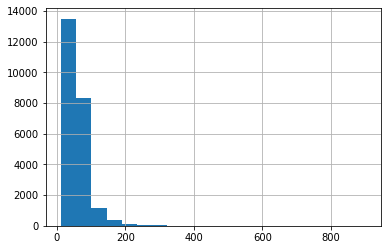

In [48]:
data['total_area'].hist(bins=20, figsize=(6, 4))

Большая часть площадей квартир составляет меньше 100 $м^2$. Площади квартир больше 400 метров, судя по гистограмме, являются выбросами. Посмотрим на укрупненную диаграмму в диапазоне площадей квартир до 200 $м^2$. 

<AxesSubplot:>

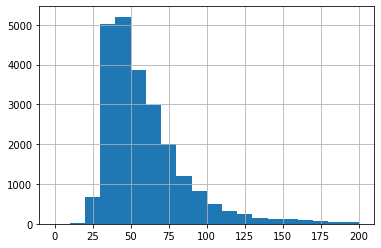

In [49]:
data['total_area'].hist(bins=20, figsize=(6, 4), range=(0, 200))

Из диаграммы выше становится очевидно, что большинство квартир имеют площадь от 25 до 100 $м^2$.

Изучим жилую площадь квартир при помощи гистограмм.

<AxesSubplot:>

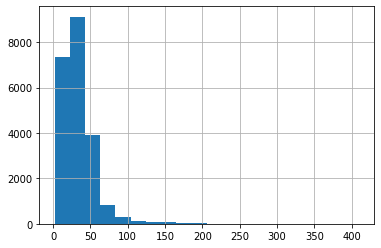

In [50]:
data['living_area'].hist(bins=20, figsize=(6, 4))

<AxesSubplot:>

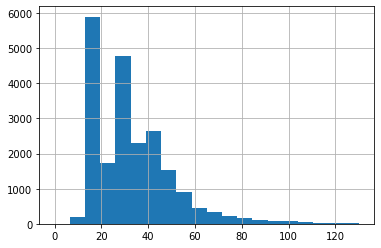

In [51]:
data['living_area'].hist(bins=20, figsize=(6, 4), range=(0, 130))

Большая часть жилых площадей квартир находится в диапазоне от 10 до 60 $м^2$. Квартиры с жилплощадями больше 200 $м^2$ можно считать выбросами.

Изучим площади кухонь в квартирах.

<AxesSubplot:>

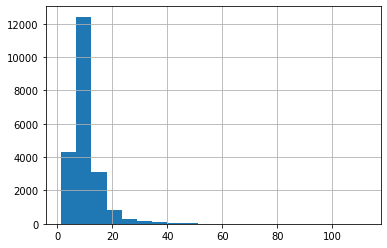

In [52]:
data['kitchen_area'].hist(bins=20, figsize=(6, 4))

<AxesSubplot:>

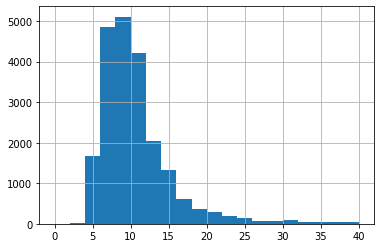

In [53]:
data['kitchen_area'].hist(bins=20, figsize=(6, 4), range=(0, 40))

Здесь большая часть площадей кухонь составляет от 4-5 до 15 $м^2$. Площади кухонь больше 60 $м^2$ можно считать выбросами.

Изучим гистограммы цен на жилье. Из гистограммы ниже очевидно, что есть выбросы и необходимо менять масштаб гистограммы. Посмотрим на распределение цен квартир меньше 20 млн. 

<AxesSubplot:>

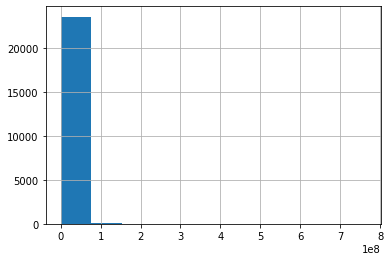

In [54]:
data['last_price'].hist(bins=10, figsize=(6, 4))

<AxesSubplot:>

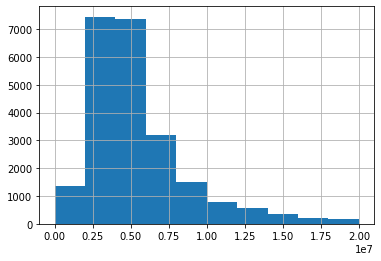

In [55]:
data['last_price'].hist(bins=10, figsize=(6, 4), range=(0, 20000000))

Из гистограммы выше следует, что цены на большинство кватир находятся в диапазоне от 2.5 до 1 млн рублей. Цены выше 20-30 млн в данной выборке можно считать выбросами.

Изучим общее число комнат в квартирах. В данном случае квартиры, в которых больше 8 комнат, можно считать выбросами. 

<AxesSubplot:>

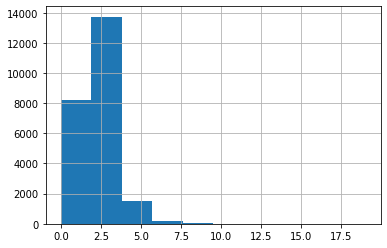

In [56]:
data['rooms'].hist(figsize=(6, 4))

<AxesSubplot:>

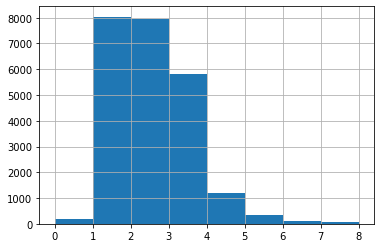

In [57]:
data['rooms'].hist(bins=8, figsize=(6, 4), range=(0, 8))

Из гистогараммы выше следует, что больше всего в выборке 1-комнатных и 2-комнатных квартир, далее по частоте идут 3-комнатные квартиры, следом 4-комнатные. Квартир остальных видов меньше 1000 по каждому отдельно взятому числу комнат.

Изучим высоту потолков в квартирах. Здесь квартиры, в которых высота потолков больше 4 м, скорее являются выбросами. 

<AxesSubplot:>

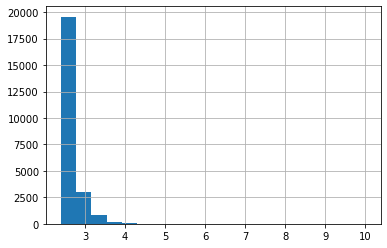

In [58]:
data['ceiling_height'].hist(bins=20, figsize=(6, 4))

<AxesSubplot:>

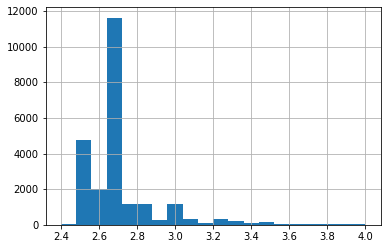

In [59]:
data['ceiling_height'].hist(bins=20, figsize=(6, 4), range=(2.4, 4))

У большинства квартир высота потолков около 2.7 м, далее идут квартиры с потолками около 2.5 м.

Изучим то, на каком этаже находятся продаваемые квартиры. Многие из продаваемых квартир находятся на 1-4 этажах, далее как правило (но не всегда) число продаваемых квартир убывает с увеличением этажа.


<AxesSubplot:>

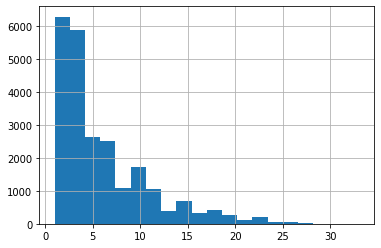

In [60]:
data['floor'].hist(bins=20, figsize=(6, 4))

Посмотрим на гистограмму, определяющую, какие этажи в доме обычно продаются. Как правило люди продают квартиры не на первом и не на последнем этаже – таких в выборке большинство.

<AxesSubplot:>

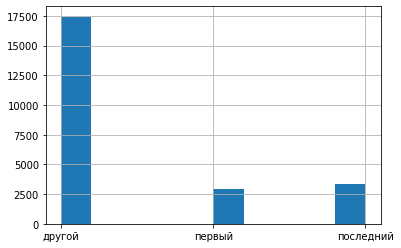

In [61]:
data['floor_type'].hist(figsize=(6, 4))

Изучим общее количество этажей в домах, где продаются квартиры. Дома с более чем 30 этажами можно считать выбросами.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Полученные данные соответствуют реалиям
</div>

<AxesSubplot:>

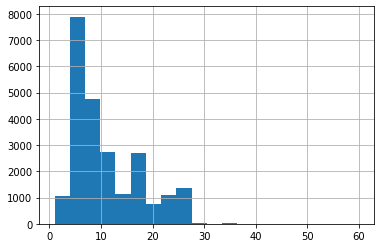

In [62]:
data['floors_total'].hist(bins=20, figsize=(6, 4))

<AxesSubplot:>

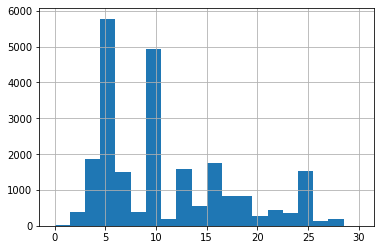

In [63]:
data['floors_total'].hist(bins=20, figsize=(6, 4), range=(0, 30))

Очень многие из продаваемых квартир расположены в 5- и 10-этажных домах. Большое количество 5-этажных домов можно объяснить большим количеством хрущовок в СПб: хрущовки строились пятиэтажными. 10-этажные дома – это, наиболее вероятно, сталинки или уже постройки после 90х годов. 

Изучим распределение расстояния от центра до продаваемых квартир (в метрах). Большинство квартир находится на растоянии до 20 км от центра. Отдельно встречаются выбросы по квартирам, находящимся далее, чем в 40 км от центра. Скорее всего это уже квартиры в Ленобласти. 

<AxesSubplot:>

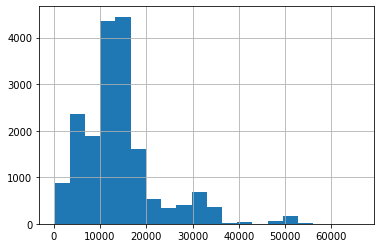

In [64]:
data['cityCenters_nearest'].hist(bins=20, figsize=(6, 4))

Изучим распределение расстояния от аэропорта до продаваемых квартир (в метрах). Большинство квартир находится на расстоянии от 10 до 55 км от аэропорта. 

<AxesSubplot:>

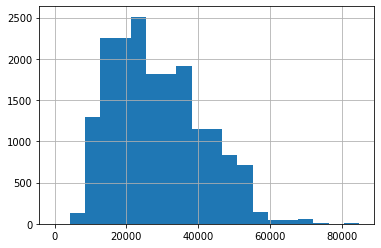

In [65]:
data['airports_nearest'].hist(bins=20, figsize=(6, 4))

Изучим расстояние до ближайшего парка. Большинство квартир находятся на расстоянии меньше, чем 1 км, до парка.

<AxesSubplot:>

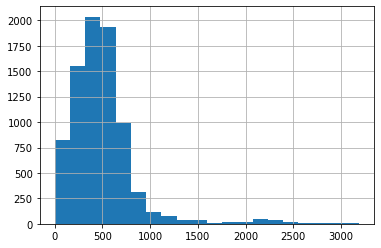

In [66]:
data['parks_nearest'].hist(bins=20, figsize=(6, 4))

Изучим распределение публикаций по дням недели и месяцам. Объявления чаще размещались по будням, нежели по выходным. Если говорить о месяцах, то квартиры чаще выставляли в феврале-апреле; реже всего квартиры выставлялись в мае (видимо из-за майских праздников); летом квартиры также реже выставляли на продажу. Осенью выставляют уже чаще чем летом. Спад наблюдается в декабре-январе (видимо, из-за предновогодней суеты и новогодних праздников).

<AxesSubplot:>

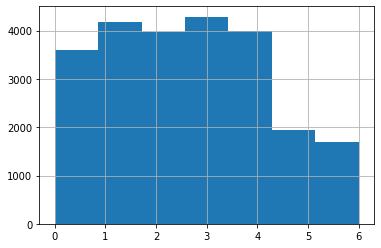

In [67]:
data['weekday'].hist(bins=7, figsize=(6, 4))

<AxesSubplot:>

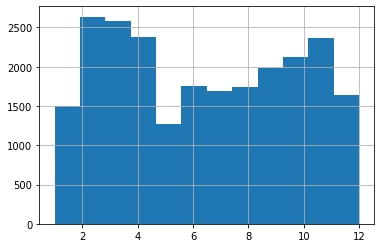

In [68]:
data['month'].hist(bins=12, figsize=(6, 4))

#### Изучение быстроты продажи квартир

Изучим то, как быстро продавались квартиры на основе параметра `days_exposition`. Посмотрим на гистограмму.

<AxesSubplot:>

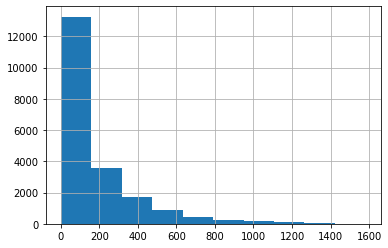

In [69]:
data['days_exposition'].hist()

Большинство квартир продавались менее чем за 200 дней, однако есть и те, что были выставлены более 4 лет. Увеличив масштаб для большей детализации, можем заметить, что многие квартиры продавались менее, чем за полгода.

<AxesSubplot:>

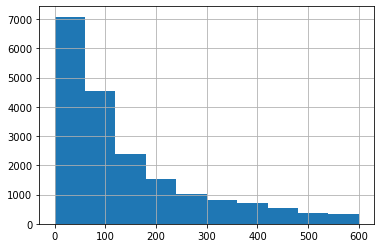

In [70]:
data['days_exposition'].hist(range=(0, 600))

Посчитаем медиану и среднее. Среднее в два раза превышает медиану, видимо, из-за выбросов в виде редких случаев, когда квартира была выставлена более 3-4 лет. Медиана же отражает более адекватную ситуацию: половина квартира была продана менее, чем за 95 дней, остальная половина была продана более, чем за 95 дней.

In [71]:
# среднее
data['days_exposition'].mean()

180.95233216237315

In [72]:
# медиана
data['days_exposition'].median()

95.0

Для оценки того, какие продажи можно считать быстрыми, а какие необычно долгими, построим диаграмму размаха. 

(-10.0, 600.0)

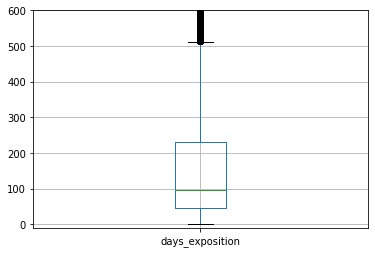

In [73]:
data.boxplot(column='days_exposition')
plt.ylim(-10, 600)

Размахом длительности продаж можно считать межквартирльный размах: от 0 до 500 дней (приблизительно). Продажи, которые длятся больше 500 дней можно считать необычно долгими. Просто быстрыми продажами можно считать продажи в первом квартиле, т.е. продажи длившиеся до 1.5 месяцев:

In [74]:
data['days_exposition'].quantile(q=0.25).round()

45.0

#### Изучение влияния факторов на общую стоимость квартиры

Изучим то, какие факторы больше всего влияют на общую стоимость квартиры. Построим диаграммы рассеяния для следующих параметров: 
* общей площади;
* жилой площади;
* площади кухни;
* количества комнат;
* этажа, на котором расположена квартира (первый, последний, другой);
* даты размещения (день недели, месяц, год). <br/>

In [75]:
import warnings
warnings.filterwarnings('ignore')

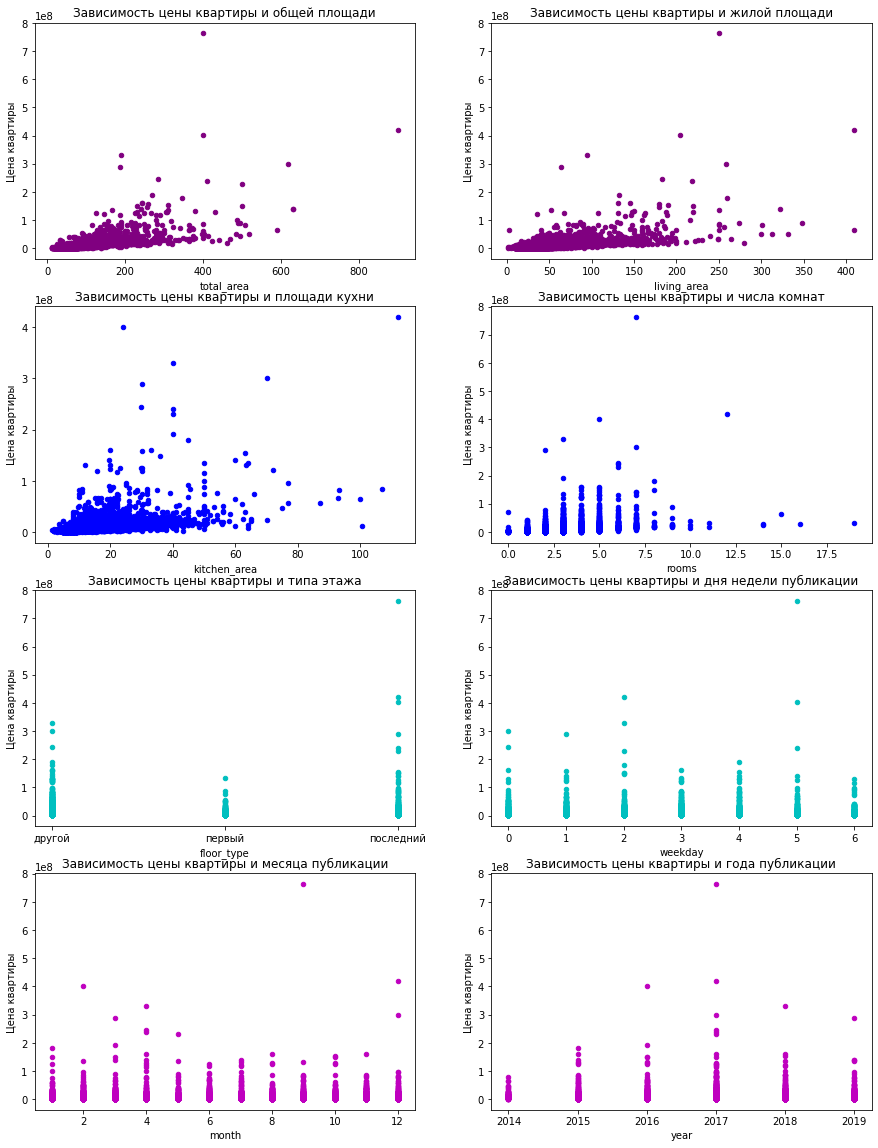

In [76]:
# На одном полотне 4 на 2 построим 8 диаграмм рассеяния для указанных выше параметров 
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

# список рассматриваемых регрессоров как названий столбцов
list_of_factors = [
    ['total_area', 'living_area'], 
    ['kitchen_area', 'rooms'], 
    ['floor_type', 'weekday'], 
    ['month', 'year']
]
# список названий столбцов
list_of_titles = [
    ['Зависимость цены квартиры и общей площади',
    'Зависимость цены квартиры и жилой площади'], 
    ['Зависимость цены квартиры и площади кухни',
    'Зависимость цены квартиры и числа комнат'],
    ['Зависимость цены квартиры и типа этажа',
    'Зависимость цены квартиры и дня недели публикации'],
    ['Зависимость цены квартиры и месяца публикации',
    'Зависимость цены квартиры и года публикации']
]
# список цветов для диаграмм 
list_of_colors = ['purple', 'b', 'c', 'm']

ylabel = 'Цена квартиры'

# Запустим цикл, строящий диаграммы рассеяния
for i in range(4):
    for j in range(2):
        data.plot(
            ax=axes[i, j], 
            x=list_of_factors[i][j], 
            y='last_price', 
            kind='scatter', 
            c=list_of_colors[i], 
            title=list_of_titles[i][j],
            xlabel=list_of_factors[i][j],
            ylabel=ylabel
        )

Про первые три диаграммы рассеяния можно сказать, что наблюдается увеличение цены квартиры при увеличении соответствующего графика. Наверняка если мы будем строить корелляционную матрицу, то для данных показателей корреляция будет положительной. <br/>

Про остальные диаграммы рассеяния сложно что-то конкретное сказать, будем смотреть на диаграммы по сгруппированным данным.

Построим ниже диаграммы на основе группировок данных:

<AxesSubplot:title={'center':'Зависимость цены квартиры и общей площади'}, xlabel='total_area'>

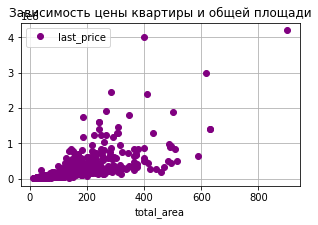

<AxesSubplot:title={'center':'Зависимость цены квартиры и жилой площади'}, xlabel='living_area'>

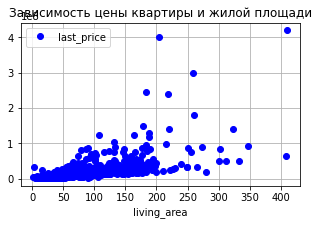

<AxesSubplot:title={'center':'Зависимость цены квартиры и площади кухни'}, xlabel='kitchen_area'>

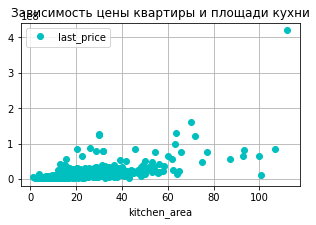

<AxesSubplot:title={'center':'Зависимость цены квартиры и числа комнат'}, xlabel='rooms'>

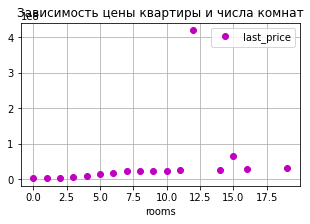

<AxesSubplot:title={'center':'Зависимость цены квартиры и типа этажа'}, xlabel='floor_type'>

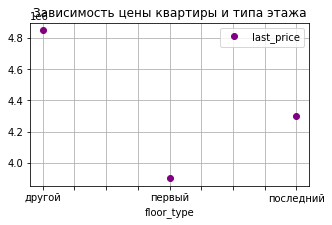

<AxesSubplot:title={'center':'Зависимость цены квартиры и дня недели публикации'}, xlabel='weekday'>

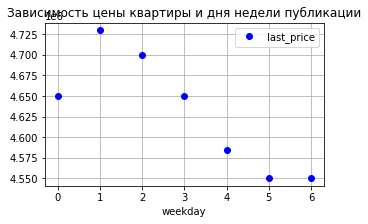

<AxesSubplot:title={'center':'Зависимость цены квартиры и месяца публикации'}, xlabel='month'>

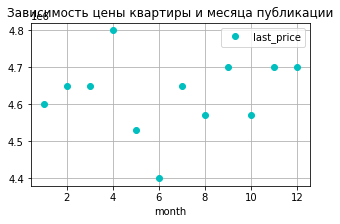

<AxesSubplot:title={'center':'Зависимость цены квартиры и года публикации'}, xlabel='year'>

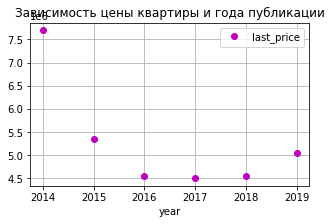

In [77]:
# список рассматриваемых регрессоров как названий столбцов
list_of_factors_pivot = [
    'total_area', 
    'living_area', 
    'kitchen_area', 
    'rooms', 
    'floor_type', 
    'weekday', 
    'month', 
    'year'
]

# список названий столбцов
list_of_titles_pivot = [
    'Зависимость цены квартиры и общей площади',
    'Зависимость цены квартиры и жилой площади', 
    'Зависимость цены квартиры и площади кухни',
    'Зависимость цены квартиры и числа комнат',
    'Зависимость цены квартиры и типа этажа',
    'Зависимость цены квартиры и дня недели публикации',
    'Зависимость цены квартиры и месяца публикации',
    'Зависимость цены квартиры и года публикации']
    
# список цветов для диаграмм     
list_of_colors_pivot = ['purple', 'b', 'c', 'm', 'purple', 'b', 'c', 'm']
    
# Запустим цикл, строящий диаграммы
for i in range(len(list_of_factors_pivot)):
    display(
        data
        .pivot_table(index=list_of_factors_pivot[i], values='last_price', aggfunc='median')
        .plot(
            grid=True, 
            style='o', 
            figsize=(5, 3), 
            title=list_of_titles_pivot[i], 
            color=list_of_colors_pivot[i]
        )
    )
    plt.show()

Вывод для первых трех диаграмм остается прежним: с ростом фактора цена квартиры увеличивается. <br/>
К связи числа комнат и цены мы вернемся чуть позднее. <br/>
Медианная цена квартиры не на первом и не на последнем этаже выше, чем цена квартиры на последнем этаже. Дешевле всего стоят квартиры на первом этаже.<br/>
Дороже всего продаются квартиры, выставленные во вторник. Далее цена плавно снижается. Дешевле всего продаются квартиры, выставленные в пт-сб.<br/>
По месяцам дешевле всего уходят квартиры, выставленные в мае, дороже всего – в апреле.<br/>
По годам дороже всего квартиры продавались в 2014 году, далее пошел спад. Самые низкие цены были в 2017 году, далее снова начался рост цен на недвижимость. 

Что касается количества комнат: в среднем с ростом числа комнат также цена увеличивается. Однако мы можем наблюдать сильный выброс в случае, видимо, какой-то 12-комнатной квартиры.
Посмотрим, что это за квартира:

In [78]:
data.query('rooms == 12')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,location,price_per_m2,weekday,month,year,floor_type,city_center_km
19540,8,420000000.0,900.0,2017-12-06,12,2.8,25.0,409.7,25,0,...,2.0,318.0,106.0,санкт-петербург,466666.666667,2,12,2017,последний,8.0


Действительно, в данных есть одна квартира стоимостью 420 млн рублей с общей площадью 900 $м^2$ и имеющая 12 комнат. В нашей выборке данная квартира является выбросом, поэтому отбросим ее:

In [79]:
data = data.query('rooms != 12')

Посмотрим еще раз на диаграмму для числа комнат:

<AxesSubplot:title={'center':'Зависимость цены квартиры и числа комнат'}, xlabel='rooms'>

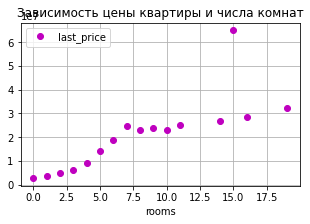

In [80]:
# фактор "число комнат" ранее был четвертым (т.е. третьим) в списке:
i = 3

(data
 .pivot_table(index=list_of_factors_pivot[i], values='last_price', aggfunc='median')
 .plot(
     grid=True, 
     style='o', 
     figsize=(5, 3), 
     title=list_of_titles_pivot[i], 
     color=list_of_colors_pivot[i]
 )
)

Действительно, наблюдается рост цены квартиры при увеличении числа комнат.

Посчитаем коэффициенты корреляции Пирсона:

In [81]:
# Для количественных переменных рассчитает коэффициент корреляции Пирсона:
for k in range(len(list_of_factors_pivot[:4])):
    corr = data['last_price'].corr(data[list_of_factors_pivot[k]]).round(2)
    print(f'Коэффициент корреляции Пирсона факторов last_price и {list_of_factors_pivot[k]}: {corr}')

Коэффициент корреляции Пирсона факторов last_price и total_area: 0.64
Коэффициент корреляции Пирсона факторов last_price и living_area: 0.56
Коэффициент корреляции Пирсона факторов last_price и kitchen_area: 0.51
Коэффициент корреляции Пирсона факторов last_price и rooms: 0.36


Действительно, как и ожидалось, коэффициент корреляции положителен и больше 0.5, следовательно, мы можем утверждать о наличии положительной корреляции между переменными. Больше всего на цену квартиры, видимо, влияет фактор с наибольшем к-том корреляции - общая площадь. В целом все указанные в ячейке выше факторы сильно влияют на цену квартиры.

#### Расчет средней цены квадратного метра в населенных пунктах

Рассчитаем среднюю цену квадратного метра в топ-10 по количеству объявлений населенным пунктам.

In [82]:
# Выделим топ-10 населенных пунктов по количеству объявлений
data_top_10 = (data
               .pivot_table(index='location', values='last_price', aggfunc='count')
               .sort_values(by='last_price', ascending=False)
               .head(10)
              )
data_top_10

,last_price
location,
санкт-петербург,15710
мурино,590
кудрово,471
шушары,440
всеволожск,397
пушкин,369
колпино,338
парголово,327
гатчина,307


In [83]:
# Соберем сводную таблицу со средними ценами квадртного метра в разных населенных пунктах
data_ave_m2price = data.pivot_table(index='location', values='price_per_m2')
data_ave_m2price.head()

,price_per_m2
location,
агалатово,71214.470963
александровская,70262.807084
алексеевка,22222.222222
аннино,63322.637137
аро,51412.421933


In [84]:
# Объединим имеющуюся таблицу с топ-10 локациями с таблицей со средней стоимостью квадратного метра
data_top_10.merge(data_ave_m2price, on='location')

,last_price,price_per_m2
location,,
санкт-петербург,15710,114841.235489
мурино,590,86087.512050
кудрово,471,95326.179139
шушары,440,78677.364217
всеволожск,397,68719.320400
пушкин,369,103125.819291
колпино,338,75424.579098
парголово,327,90175.913458
гатчина,307,68746.146763


Таким образом, мы можем заметить, что среди населенных пунктов, в которых продавалось больше всего квартир, самая дорогая недвижимость в Санкт-Петербурге. Следом идет город Пушкин. В остальнвх населенных пунктах недвижимость дешевле 100 тыс. руб. за $м^2$. Самая низкая цена за $1 м^2$ в данном списке в Выборее.

In [85]:
data.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,last_price
locality_name,,
Санкт-Петербург,15710,5500000.0
посёлок Мурино,522,3400000.0
посёлок Шушары,440,3950000.0
Всеволожск,397,3450000.0
Пушкин,369,5180000.0
Колпино,338,3600000.0
посёлок Парголово,327,4100000.0
Гатчина,307,3100000.0
деревня Кудрово,299,3790000.0


####  Расчет средней цены стоимости километров от центра Петербурга

Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [86]:
# Средняя цена каждого километра в исходной таблице
data['km_price'] = data['last_price'] / data['city_center_km']

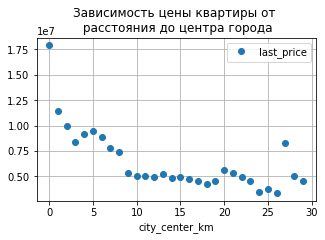

In [87]:
# Построим диаграмму, описывающую зависимость цены квартиры от расстояния до центра города
(data
 .query('location == "санкт-петербург"')
 .pivot_table(index='city_center_km', values='last_price', aggfunc='median')
 .plot(
     grid=True, 
     style='o', 
     figsize=(5, 3),
     title = 'Зависимость цены квартиры от \n расстояния до центра города'
 )
);

In [88]:
# коэффициент корреляции
data['city_center_km'].corr(data['last_price']).round(2)

-0.21

Можем заметить, что чем больше удаленность квартиры от центра, тем, как правило, ниже её цена.

**Вывод:**
Таким образом, в данном разделе в целом мы пришли к следующим выводам. 
* В среднем квартиры продавались за 3 месяца, однако есть и те, что продавались быстро – за месяц, а есть и те, что были выставлены по 3, 4, 5 лет.
* На общую стоимость квартир больше всего влияет общая площадь. В целом сильно влияет жилая площадь, площадь кухни и количество комнат. 
* Квартиры не на 1 и не на последнем этаже продаются дороже остальных. 
* Самая дорогая недвижимость в Ленобласти среди населенных пунктов с наибольшим количеством размещенных объявлений – в Санкт-Петербурге, самая дешевая – в Выборге.
* Чем дальше квартира расположена от центра, тем ниже её стоимость. 

### Общий вывод

Целью данного проекта являлась предобработка данных и изучение интересных особенностей и зависимостей, которые существуют на рынке недвижимости.

На вход мы получили таблицу с 23699 строками.
Изначально нам удалось выяснить природу около 5.5 тысяч пропусков в исходных данных: порядка 5500 квартир, выставленных на продажу, находятся достаточно далеко от аэропортов, центра города, парков и прудов, поэтому в таблице возникает столько пропущенных значений. 
Пропуски в столбцах `ceiling_height`, `balcony`, `is_apartment` были обработаны, остальные пропуски были оставлены как есть.
Также была предпринята попытка объяснить возможные причины возникновения пропусков в столбцах.

Далее были обработаны типы данных, в частности, приведен формату даты-времени столбец с датой появления объявления на сайте. Также мы обработали текстовый столбец с наименованиями населенных пунктов, получив в новом столбце уникальные значения. 

Мы изучили аномалии в данных и исключили их. 

В ходе предобработки в таблицу были добавлены новые столбцы: 
1) цену 1 квадратного метра;
2) день недели публикации объявления;
3) месяц публикации объявления;
4) год публикации объявления;
5) тип этажа квартиры;
6) расстояние до центра города в километрах.

Также было обнаружено следующее: 
* Большинство квартир имеют площадь от 25 до 100 $м^2$. Большая часть жилых площадей квартир находится в диапазоне от 10 до 60 $м^2$. Большая часть площадей кухонь составляет от 4-5 до 15 $м^2$.
* Цены на большинство кватир находятся в диапазоне от 2.5 до 1 млн рублей. Цены выше 20-30 млн в данной выборке можно считать выбросами.
* Больше всего в выборке 1-комнатных и 2-комнатных квартир, далее по частоте идут 3-комнатные квартиры, следом 4-комнатные. 
* У большинства квартир высота потолков около 2.7 м, далее по частоте идут квартиры с потолками около 2.5 м.
* Как правило люди продают квартиры не на первом и не на последнем этаже – таких в выборке большинство.
* Очень многие из продаваемых квартир расположены в 5- и 10-этажных домах. 
* Большинство квартир находится на растоянии до 20 км от центра. Отдельно встречаются выбросы по квартирам, находящимся далее, чем в 40 км от центра (вероятно, это квартиры в Ленобласти).
* Большинство квартир находится на расстоянии от 10 до 55 км от аэропорта.
* Большинство квартир находятся на расстоянии меньше, чем 1 км, до парка.
* Объявления чаще размещались по будням, нежели по выходным. 
* По месяцам квартиры чаще выставляли в феврале-апреле; реже всего квартиры выставлялись в мае.

Большинство квартир продавались менее чем за 200 дней, однако есть и те, что были выставлены более 4 лет. Медианный срок продажи квартиры составил 95 дней. Продажи, которые длятся больше 500 дней можно считать необычно долгими. Быстрыми же продажами можно считать продажи, длившиеся до 1.5 месяцев.

На общую стоимость квартир больше всего влияют общая площадь, жилая площадь, площадь кухни и количество комнат. Также на нее влияет то, на каком этаже расположена квартира: на первом, последнем или другом этаже. Дороже остальных продаются квартиры на *другом* этаже. 

Еще одним факторов, влияющим на цену на жилье, является населенный пункт. <br/> Если составить рейтинг топ-10 населенных пунктов Ленинградской области по количеству объявлений, то самая дорогая недвижимость будет в Санкт-Петербурге, самая дешевая – в Выборге. Также достаточно дорогая недвижимость в городе Пушкин (больше 100 тыс. руб. за $м^2$, однако это дешевле, чем в СПб). И, конечно же, на стоимость влияет удаленность квартиры от центра: чем дальше квартира расположена от центра, тем ниже её стоимость. 